In [1]:
import read_txt
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import SVG, display 
import collections
import itertools

In [2]:
links = read_txt.read_links('links.txt')
names = read_txt.read_names('nicknames.txt')
name_list = []
for name in names:
    name_list.append(name['name'])

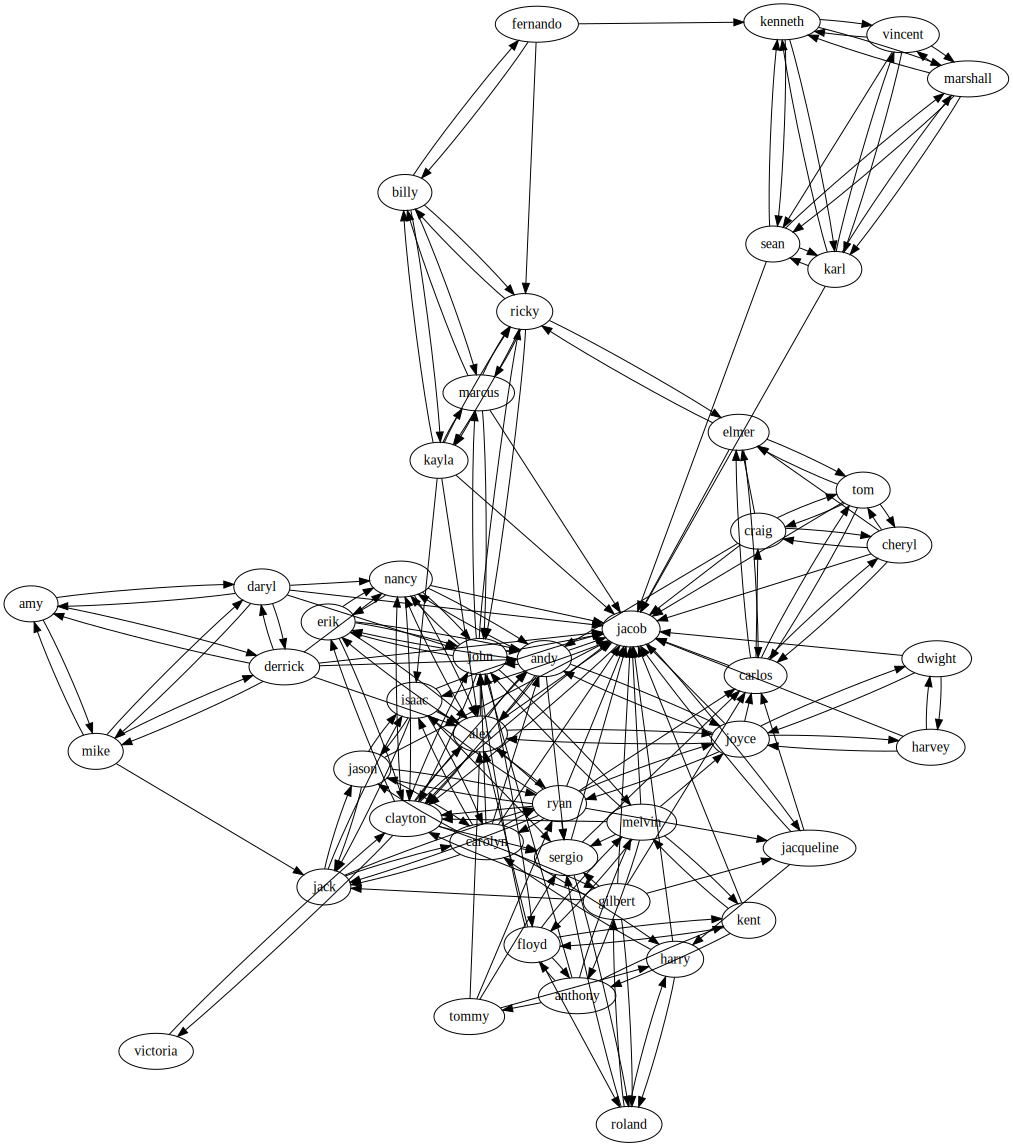

In [3]:
G = nx.DiGraph()
for link in links:
    from_name = name_list[link['from']]
    to_name = name_list[link['to']]
    G.add_path([from_name, to_name])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)

In [4]:
link_list = []
with open("link_list.txt", 'wt') as f:
    for link in links:
        link_list.append([name_list[link['from']], name_list[link['to']]])
        f.write(name_list[link['from']]+'\t'+name_list[link['to']]+'\n')

In [5]:
# ノードの追加
tag_count = collections.Counter(itertools.chain.from_iterable(link_list))
G = nx.Graph()
G.add_nodes_from([(tag, {"count":count}) for tag,count in zip(tag_count.keys(), tag_count.values())])

In [6]:
for link in link_list:
    G.add_path([link[0], link[1]])

In [7]:
print('The number of edges: %d' % nx.number_of_nodes(G))   # ノード数
print('The number of nodes: %d' % nx.number_of_edges(G))   # エッジ数

The number of edges: 45
The number of nodes: 152


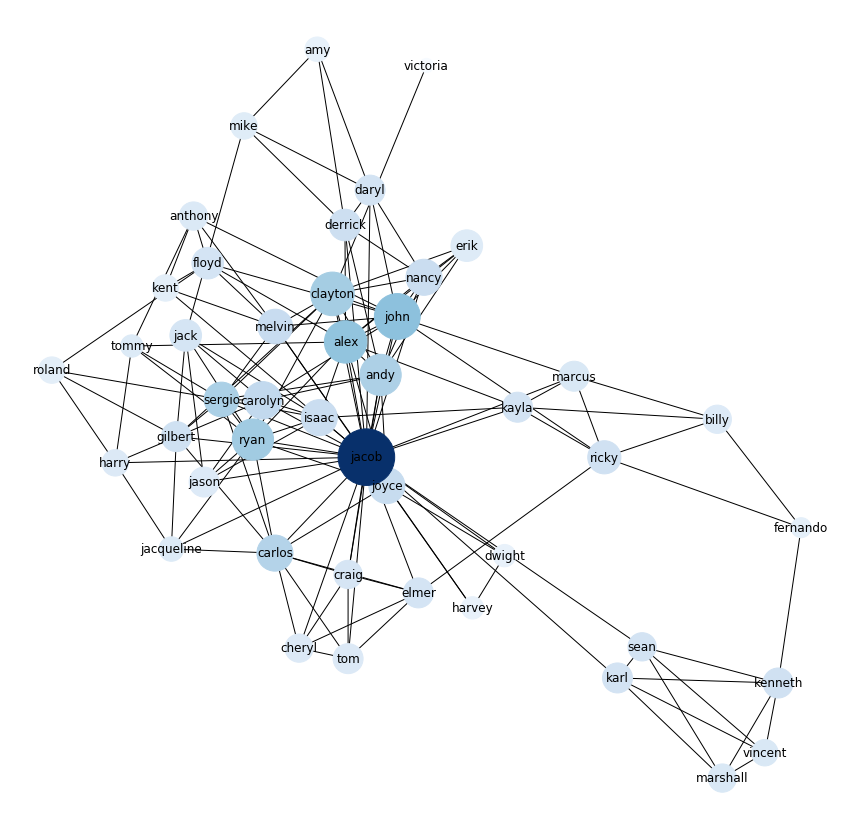

In [9]:
# レイアウトの取得
pos = nx.spring_layout(G)

# ページランクの計算
pr = nx.pagerank(G)

# 可視化
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(G, pos, arrows=True)
# 出現回数が多いほどノードの大きさを大きくする
node_size = [ d["count"]*100 for (n,d) in G.nodes(data=True)]
# ページランクのスコアが大きいほどノードの色を濃くする
nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()), cmap=plt.cm.Blues, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=30)
plt.axis('off')
plt.show()